In [180]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
import string
import pickle
import nltk
from nltk import word_tokenize
from nltk import sent_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import  precision_score
warnings.filterwarnings("ignore")

In [117]:
encoder = LabelEncoder()
ps = PorterStemmer()
wc = WordCloud(height=400,width=400,min_font_size=10,background_color='white')
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
scaler = MinMaxScaler()
bnb = BernoulliNB()
svc = SVC()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()


In [118]:
df = pd.read_csv(r'spam_data.csv',encoding='latin-1')

In [119]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [120]:
df.shape

(5572, 2)

In [121]:
df.sample()

,target,text
95,spam,Your free ringtone is waiting to be collected....


## Data Cleaning

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [123]:
df = df.iloc[:,[1,0]]
df

,text,target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


In [124]:
# converting the target column to numeric array
df['target'] = encoder.fit_transform(df['target'])

In [125]:
df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [126]:
# missing values
df.isnull().sum()

text      0
target    0
dtype: int64

In [127]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

- there are 403 missing values

In [128]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [129]:
df.duplicated().sum()

np.int64(0)

In [130]:
df.shape

(5169, 2)

## EDA

In [131]:
df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [132]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

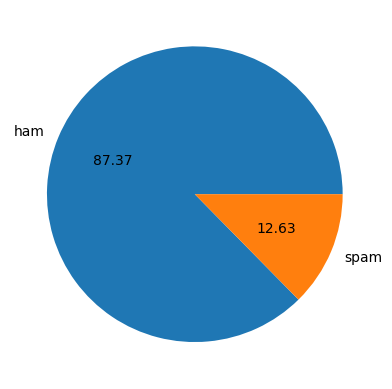

In [133]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

- data is imbalance

In [134]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\subha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [135]:
# generating a new column by calculating the number of charachters
df['num_characters'] = df['text'].apply(len)

In [136]:
df.head()

,text,target,num_characters
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61


In [137]:
# calculating the num of words and making a new column
df['num_words'] = df['text'].apply(lambda x:len(word_tokenize(x)))

In [138]:
df.head()

,text,target,num_characters,num_words
0,"Go until jurong point, crazy.. Available only ...",0,111,24
1,Ok lar... Joking wif u oni...,0,29,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,U dun say so early hor... U c already then say...,0,49,13
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15


In [139]:
# calculating the number of sentences and making a new column 
df['num_sentences'] = df['text'].apply(lambda x:len(sent_tokenize(x)))

In [140]:
df.head()

,text,target,num_characters,num_words,num_sentences
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [141]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,92.141033,18.456761,1.966531
std,83.613762,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,37.000000,9.000000,1.000000
50%,63.000000,15.000000,1.000000
75%,128.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [142]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,77.811116,17.123782,1.820195
std,71.334090,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,54.000000,13.000000,1.000000
75%,99.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [143]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,191.243492,27.675345,2.978560
std,94.441954,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,137.000000,25.000000,2.000000
50%,156.000000,29.000000,3.000000
75%,270.000000,32.000000,4.000000
max,698.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

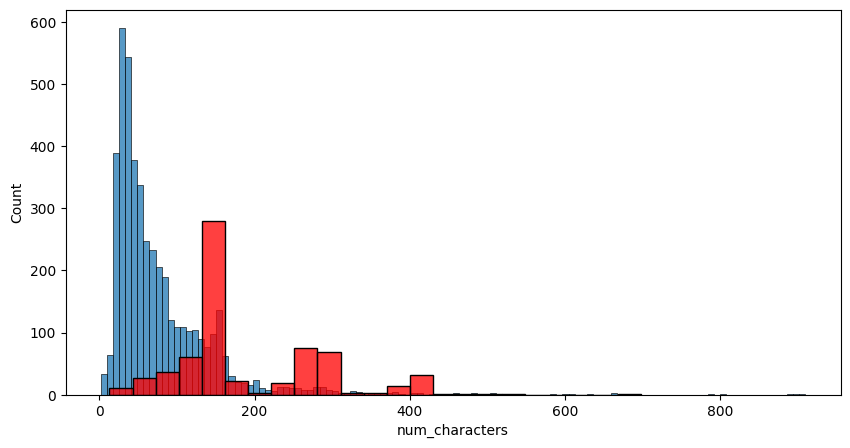

In [144]:
# relation of target column with num words
plt.figure(figsize=(10,5))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

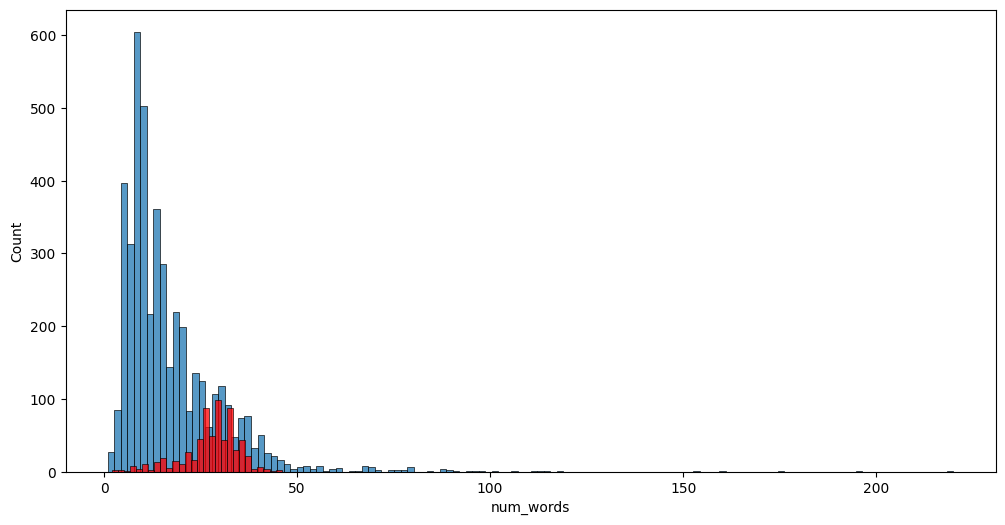

In [145]:
# relation of target with num words
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

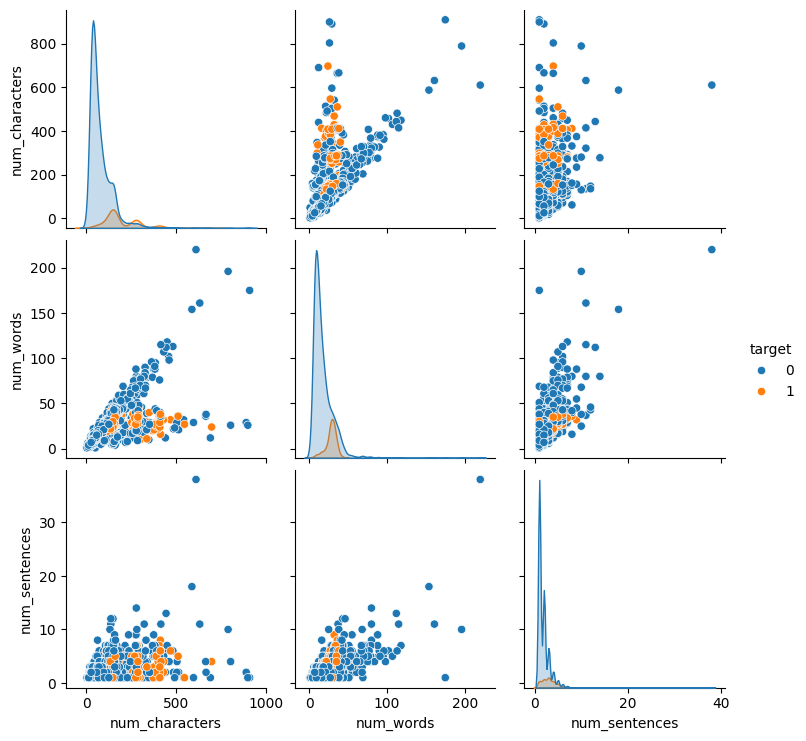

In [146]:
sns.pairplot(df,hue='target')

<Axes: >

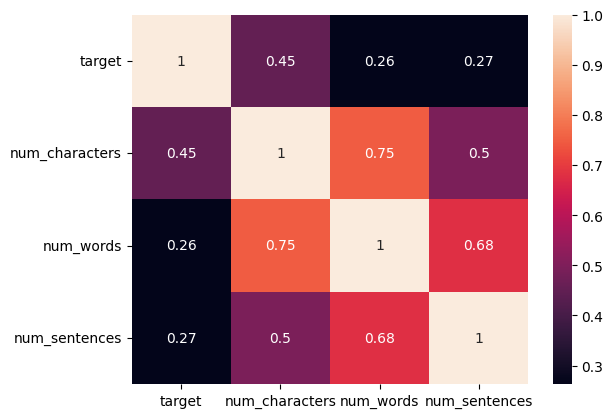

In [147]:
temp = df.drop(columns=['text'])
sns.heatmap(temp.corr(),annot=True)

## Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [148]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\subha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [149]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [150]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [151]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [152]:
df['transformed_text'] = df['text'].apply(transform_text)

In [153]:
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


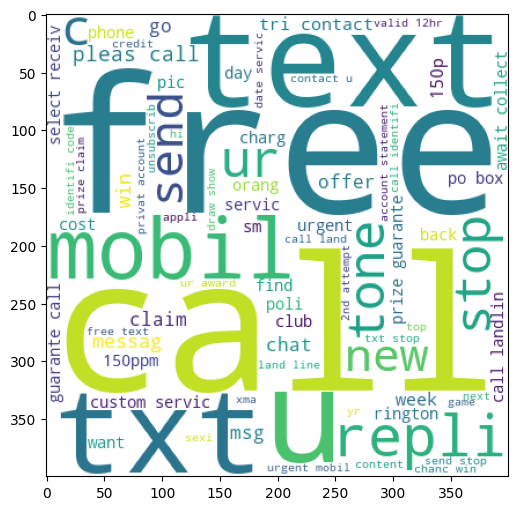

In [154]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

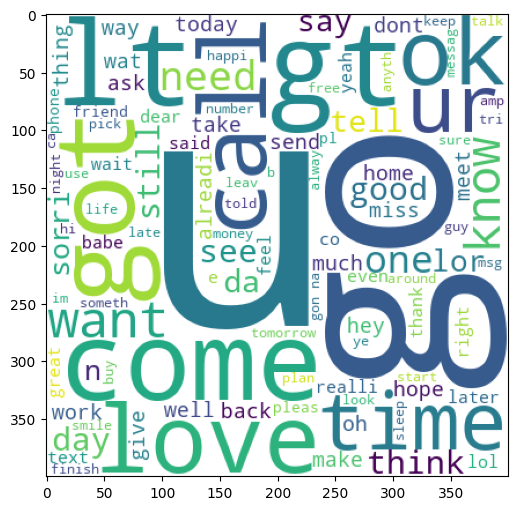

In [155]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [156]:
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


## Model Building

In [157]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [158]:
X.shape

(5169, 3000)

In [159]:

X = scaler.fit_transform(X)

In [160]:
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [161]:
X.shape

(5169, 3001)

In [162]:
y = df['target'].values

In [163]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [164]:
# Bernouli Classifier 
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
accuracy_score_bnb = accuracy_score(y_test,y_pred_bnb)
confusion_matrix_bnb = confusion_matrix(y_test,y_pred_bnb)
precision_score_bnb = precision_score(y_test,y_pred_bnb)
print("the accuracy score of Bernouli Classifier is :",accuracy_score_bnb)
print("the cofusion matrix of Bernouli Classifier is :\n",confusion_matrix_bnb)
print("the precision score of Bernouli Classifier is :",precision_score_bnb)

the accuracy score of Bernouli Classifier is : 0.9835589941972921
the cofusion matrix of Bernouli Classifier is :
 [[895   1]
 [ 16 122]]
the precision score of Bernouli Classifier is : 0.991869918699187


In [165]:
# Support vector machine 
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
accuracy_score_svc = accuracy_score(y_test,y_pred_svc)
confusion_matrix_svc = confusion_matrix(y_test,y_pred_svc)
precision_score_svc = precision_score(y_test,y_pred_svc)
print("the accuracy score of Support vector machine is :",accuracy_score_svc)
print("the cofusion matrix of Support vector machine is :\n",confusion_matrix_svc)
print("the precision score of Support vector machine is :",precision_score_svc)

the accuracy score of Support vector machine is : 0.8849129593810445
the cofusion matrix of Support vector machine is :
 [[874  22]
 [ 97  41]]
the precision score of Support vector machine is : 0.6507936507936508


In [166]:

# K-nearest classifier 
knc.fit(X_train,y_train)
y_pred_knc = knc.predict(X_test)
accuracy_score_knc = accuracy_score(y_test,y_pred_knc)
confusion_matrix_knc = confusion_matrix(y_test,y_pred_knc)
precision_score_knc = precision_score(y_test,y_pred_knc)
print("the accuracy score of K-nearest classifier is :",accuracy_score_knc)
print("the cofusion matrix of K-nearest classifier is :\n",confusion_matrix_knc)
print("the precision score of K-nearest classifier is :",precision_score_knc)

the accuracy score of K-nearest classifier is : 0.8936170212765957
the cofusion matrix of K-nearest classifier is :
 [[887   9]
 [101  37]]
the precision score of K-nearest classifier is : 0.8043478260869565


In [167]:

# Decision Tree Classifier 
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)
accuracy_score_dtc = accuracy_score(y_test,y_pred_dtc)
confusion_matrix_dtc = confusion_matrix(y_test,y_pred_dtc)
precision_score_dtc = precision_score(y_test,y_pred_dtc)
print("the accuracy score  of Decision Tree Classifier is :",accuracy_score_dtc)
print("the cofusion matrix  of Decision Tree Classifier is :\n",confusion_matrix_dtc)
print("the precision score  of Decision Tree Classifier is :",precision_score_dtc)

the accuracy score  of Decision Tree Classifier is : 0.9448742746615088
the cofusion matrix  of Decision Tree Classifier is :
 [[868  28]
 [ 29 109]]
the precision score  of Decision Tree Classifier is : 0.7956204379562044


In [168]:

# Logistic Regression
lrc.fit(X_train,y_train)
y_pred_lrc = lrc.predict(X_test)
accuracy_score_lrc = accuracy_score(y_test,y_pred_lrc)
confusion_matrix_lrc = confusion_matrix(y_test,y_pred_lrc)
precision_score_lrc = precision_score(y_test,y_pred_lrc)
print("the accuracy score of Logistic Regressionis :",accuracy_score_lrc)
print("the cofusion matrix of Logistic Regressionis :\n",confusion_matrix_lrc)
print("the precision score of Logistic Regressionis :",accuracy_score_lrc)

the accuracy score of Logistic Regressionis : 0.971953578336557
the cofusion matrix of Logistic Regressionis :
 [[893   3]
 [ 26 112]]
the precision score of Logistic Regressionis : 0.971953578336557


In [169]:
# random forest classifier 
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)
accuracy_score_rfc = accuracy_score(y_test,y_pred_rfc)
confusion_matrix_rfc = confusion_matrix(y_test,y_pred_rfc)
precision_score_rfc = precision_score(y_test,y_pred_rfc)
print("the accuracy score of random forest classifier is :",accuracy_score_rfc)
print("the cofusion matrix of random forest classifier is :\n",accuracy_score_rfc)
print("the precision score of random forest classifier is :",accuracy_score_rfc)

the accuracy score of random forest classifier is : 0.9729206963249516
the cofusion matrix of random forest classifier is :
 0.9729206963249516
the precision score of random forest classifier is : 0.9729206963249516


In [170]:
algorithms = ['BernoulliNB','SVC','KNeighborsClassifier','DecisionTreeClassifier','LogisticRegression','RandomForestClassifier']
accuracy = [accuracy_score_bnb,accuracy_score_svc,accuracy_score_knc,accuracy_score_dtc,accuracy_score_lrc,accuracy_score_rfc]
precision_score = [precision_score_bnb,precision_score_svc,precision_score_knc,precision_score_dtc,precision_score_lrc,precision_score_rfc]

In [171]:
new_df = pd.DataFrame({
    'algorithms': algorithms,
    'accuracy': accuracy,
    'precision_score': precision_score
})

In [172]:
new_df

,algorithms,accuracy,precision_score
0,BernoulliNB,0.983559,0.991870
1,SVC,0.884913,0.650794
2,KNeighborsClassifier,0.893617,0.804348
3,DecisionTreeClassifier,0.944874,0.795620
4,LogisticRegression,0.971954,0.973913
5,RandomForestClassifier,0.972921,0.966102


Text(0.5, 1.0, 'accuracy_score vs model')

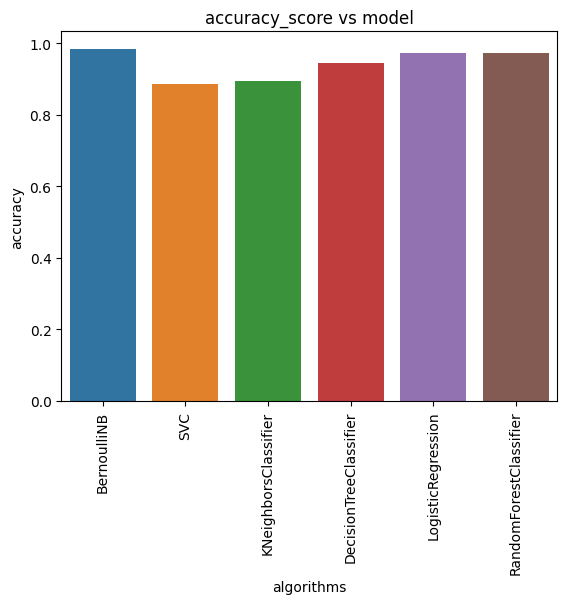

In [176]:

sns.barplot(data=new_df,x='algorithms',y='accuracy',hue='algorithms')
plt.xticks(rotation='vertical')
plt.title("accuracy_score vs model")

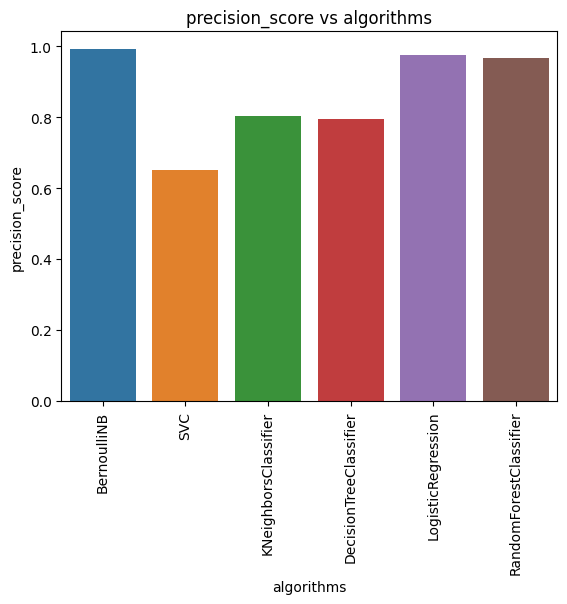

In [178]:

sns.barplot(data=new_df,x='algorithms',y='precision_score',hue='algorithms')
plt.xticks(rotation='vertical')
plt.title("precision_score vs algorithms")
plt.show()

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'BernoulliNB'),
  Text(1, 0, 'SVC'),
  Text(2, 0, 'KNeighborsClassifier'),
  Text(3, 0, 'DecisionTreeClassifier'),
  Text(4, 0, 'LogisticRegression'),
  Text(5, 0, 'RandomForestClassifier')])

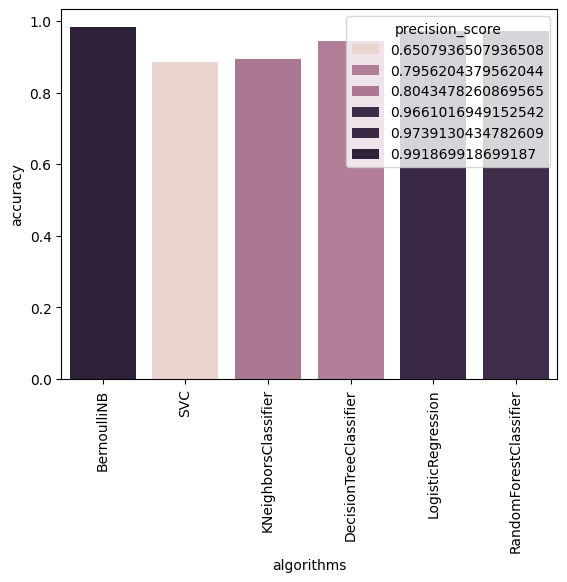

In [175]:
sns.barplot(data=new_df,x='algorithms',y='accuracy',hue='precision_score')
plt.xticks(rotation='vertical')

In [ ]:
""""
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))"""